                    Car_name   BP_USD   MP_USD   FP_USD        Make Segment  \
Year                                                                          
2008-01-01  Volkswagen Jetta  22500.0  26000.0  30000.0  Volkswagen      B1   
2008-01-01        Ford Focus  20000.0  23000.0  27000.0        Ford      B1   
2008-01-01   Hyundai Elantra  20500.0  23000.0  28000.0     Hyundai      B1   
2008-01-01           Audi TT  40000.0  45000.0  55000.0        Audi      D2   
2008-01-01           Audi A3  30000.0  35000.0  40000.0        Audi      B1   

             Min_CC   Max_CC  Single_CC  Min_HP  ...  FE_KML_MAX  TCO_Min  \
Year                                             ...                        
2008-01-01  1600.00  2000.00        NaN   150.0  ...        18.0   4000.0   
2008-01-01  1600.00  2000.00        NaN   120.0  ...        20.0   4000.0   
2008-01-01  1600.00  2000.00        NaN   120.0  ...        18.0   4000.0   
2008-01-01  1800.00  2000.00        NaN   160.0  ...        1

<Figure size 1200x600 with 0 Axes>

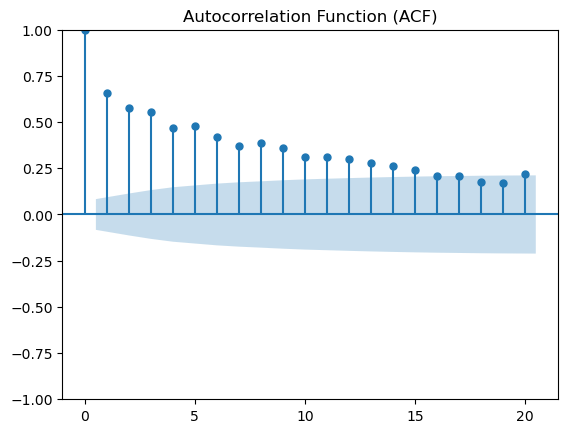

<Figure size 1200x600 with 0 Axes>

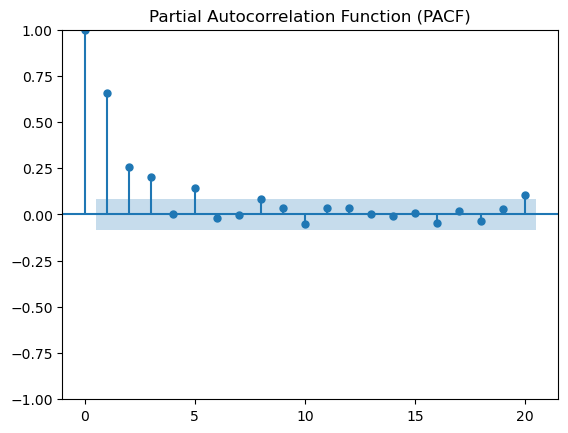

<Figure size 1200x600 with 0 Axes>

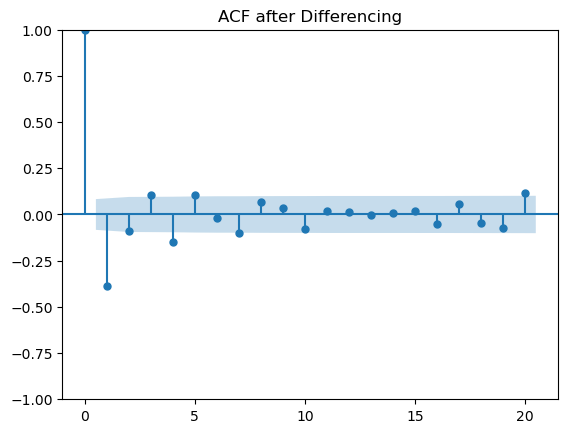

<Figure size 1200x600 with 0 Axes>

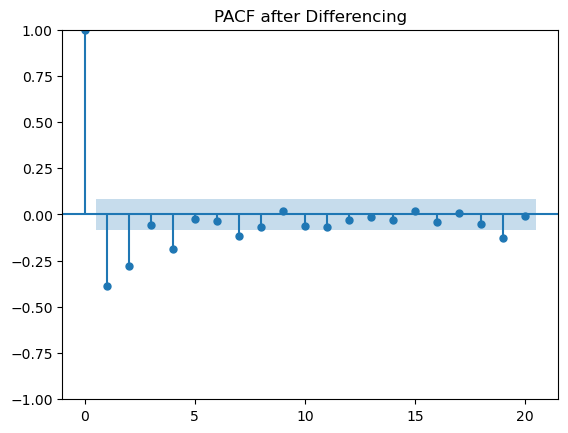

                               SARIMAX Results                                
Dep. Variable:                    YTD   No. Observations:                  555
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6911.670
Date:                Mon, 18 Nov 2024   AIC                          13829.340
Time:                        01:34:37   BIC                          13842.292
Sample:                             0   HQIC                         13834.400
                                - 555                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2040      0.039      5.225      0.000       0.127       0.281
ma.L1         -0.7530      0.033    -22.910      0.000      -0.817      -0.689
sigma2      4.172e+09    4.6e-12   9.07e+20      0.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('CS_08_20.csv')

#1 Creating DataFrame
df = pd.DataFrame(data)

# Convert 'Year' to a datetime format if it's not already (assuming yearly data)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set the 'Year' as the index for time-series modeling
df.set_index('Year', inplace=True)

# Let's first check the data structure
print(df.head())

# Select the target variable for forecasting: 'YTD'
y = df['YTD']

# Step 1: Check stationarity (using ACF and PACF plots)
plt.figure(figsize=(12, 6))
plot_acf(y, lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(y, lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

# Step 2: Differencing to make data stationary (if required)
# This step is necessary if the data is not stationary. We check for this in the ACF/PACF plots
y_diff = y.diff().dropna()

# Step 3: ACF and PACF plots on differenced data to identify p and q
plt.figure(figsize=(12, 6))
plot_acf(y_diff, lags=20)
plt.title("ACF after Differencing")
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(y_diff, lags=20)
plt.title("PACF after Differencing")
plt.show()

# Step 4: Fit the ARIMA model
# Choose p, d, q based on the ACF/PACF analysis
p, d, q = 1, 1, 1  # As an example, ARIMA(1,1,1)

# Fit the ARIMA model
model = ARIMA(y, order=(p, d, q))
model_fit = model.fit()



In [3]:
# Step 5: Model summary and diagnostics
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                    YTD   No. Observations:                  555
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6911.670
Date:                Mon, 18 Nov 2024   AIC                          13829.340
Time:                        01:34:54   BIC                          13842.292
Sample:                             0   HQIC                         13834.400
                                - 555                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2040      0.039      5.225      0.000       0.127       0.281
ma.L1         -0.7530      0.033    -22.910      0.000      -0.817      -0.689
sigma2      4.172e+09    4.6e-12   9.07e+20      0.0

In [ ]:

# Step 6: Forecast future values
forecast_steps = 5  # Forecast next 5 years (or steps)
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=y.index[-1] + pd.Timedelta(days=365), periods=forecast_steps, freq='A')

# Create a DataFrame for the forecast results
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])


In [ ]:

# Step 7: Visualize the actual and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual YTD Sales', color='blue')
plt.plot(forecast_df, label='Forecasted YTD Sales', color='red', linestyle='--')
plt.title("ARIMA Forecast - YTD Sales")
plt.legend(loc='upper left')
plt.show()

# Step 8: Evaluate the model (if we have actual values for validation)
# For simplicity, we'll assume we already have some actual values for evaluation
# You can use mean squared error (MSE) or root mean squared error (RMSE)
# mse = mean_squared_error(actual_values, forecast)
# rmse = np.sqrt(mse)
